In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import yfinance as yf

In [2]:
myticker = 'CTSH'
mydata = pd.DataFrame()
mydata[myticker] = yf.download(myticker, start = "2022-01-01", end="2022-12-31")['Adj Close']
mydata.columns = {'Close Price'}
mydata.head(10)

[*********************100%***********************]  1 of 1 completed


,Close Price
Date,
2022-01-03,87.823906
2022-01-04,89.637848
2022-01-05,88.265129
2022-01-06,86.510033
2022-01-07,85.715820
2022-01-10,84.990242
2022-01-11,86.255096
2022-01-12,86.353142
2022-01-13,85.500099


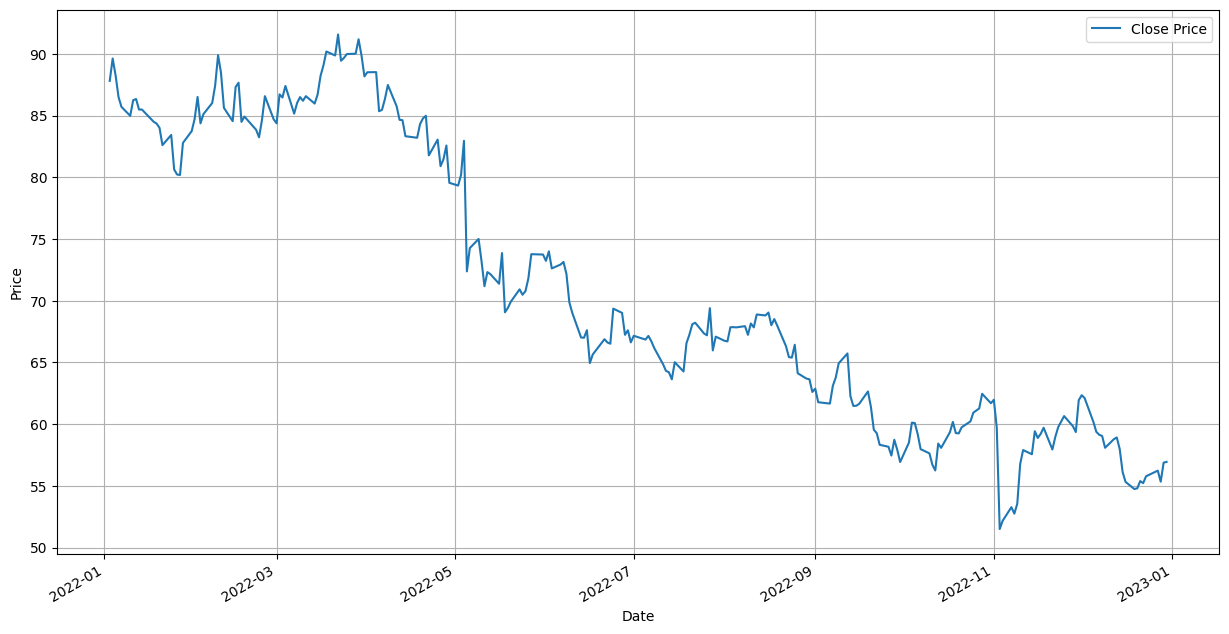

In [3]:
mydata.plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

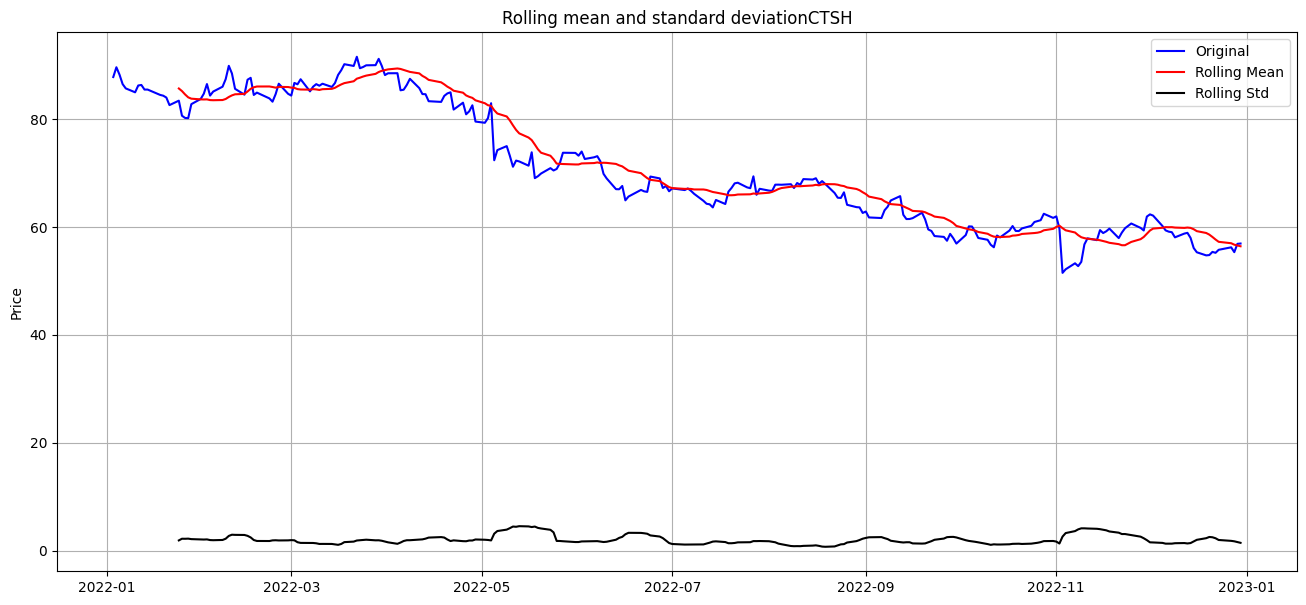

In [4]:
rolling_mean = mydata['Close Price'].rolling(15).mean()
rolling_std = mydata['Close Price'].rolling(15).std()

plt.figure(figsize = (16, 7))
fig = plt.figure(1)

orig = plt.plot(mydata['Close Price'], color='blue', label='Original')
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
std = plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation' + myticker)
plt.grid()
plt.ylabel("Price")
plt.show()

In [5]:
#create 10 days simple moving average column
mydata['SMA30'] = mydata['Close Price'].rolling(window = 30, min_periods =1).mean()

#create 60 days simples moving average column
mydata['SMA90'] = mydata['Close Price'].rolling(window = 90, min_periods =1).mean()

#display first few rows
mydata.head()

,Close Price,SMA30,SMA90
Date,,,
2022-01-03,87.823906,87.823906,87.823906
2022-01-04,89.637848,88.730877,88.730877
2022-01-05,88.265129,88.575628,88.575628
2022-01-06,86.510033,88.059229,88.059229
2022-01-07,85.715820,87.590547,87.590547


In [6]:
mydata['Signal'] = 0.0
mydata['Signal'] = np.where(mydata['SMA30'] > mydata['SMA90'], 1.0, 0.0)

mydata['Position'] = mydata['Signal'].diff()

#display first few rows
mydata.head()

,Close Price,SMA30,SMA90,Signal,Position
Date,,,,,
2022-01-03,87.823906,87.823906,87.823906,0.0,NaN
2022-01-04,89.637848,88.730877,88.730877,0.0,0.0
2022-01-05,88.265129,88.575628,88.575628,0.0,0.0
2022-01-06,86.510033,88.059229,88.059229,0.0,0.0
2022-01-07,85.715820,87.590547,87.590547,0.0,0.0


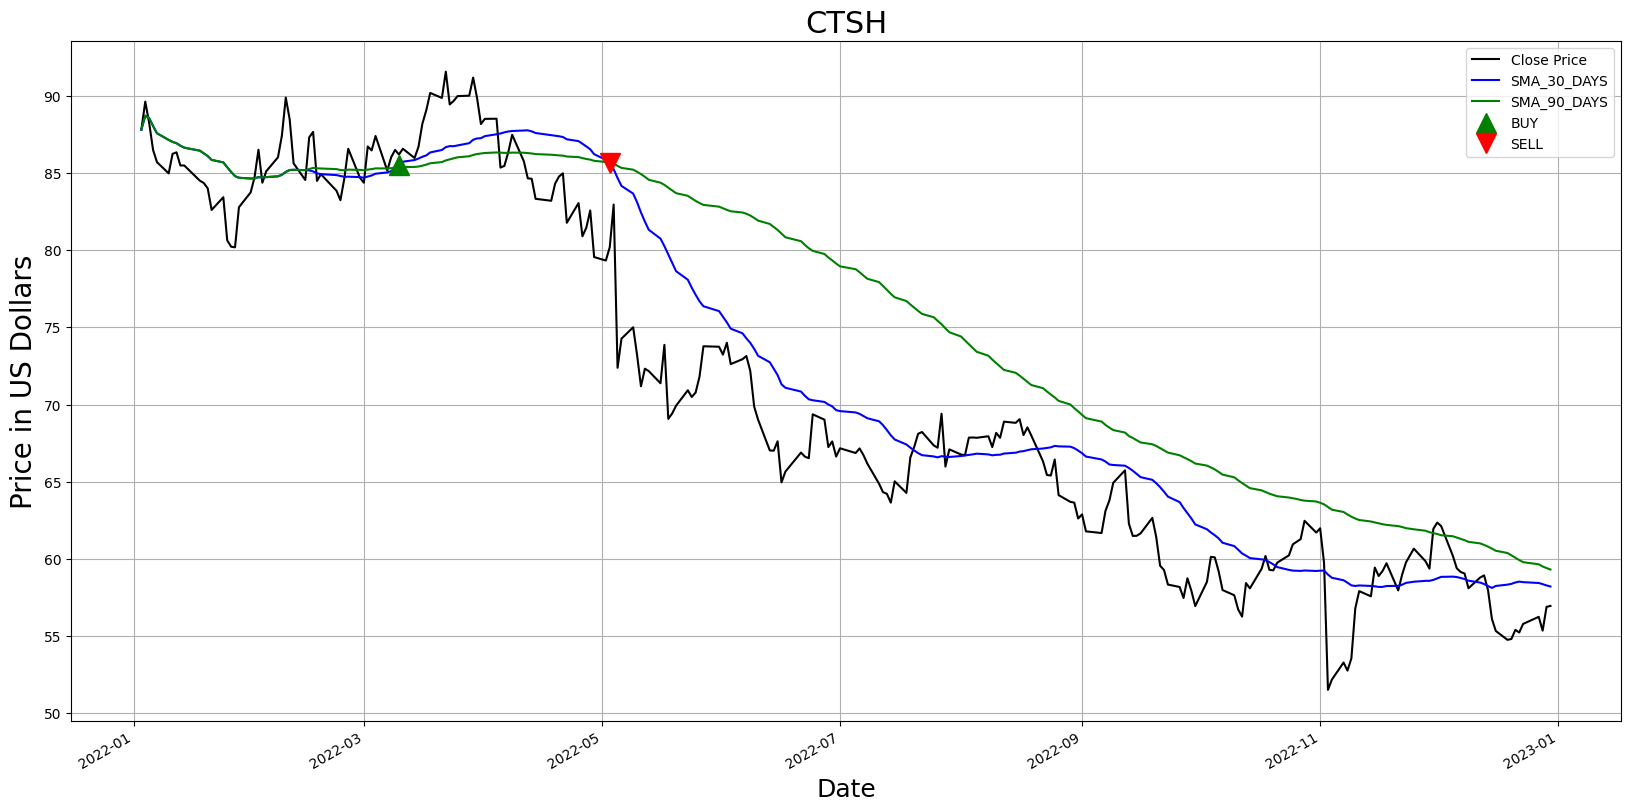

In [9]:
plt.figure(figsize=(20,10))

#Plotiing close price, short , long-term moving average
mydata['Close Price'].plot(color='k',label='Close Price')
mydata['SMA30'].plot(color='b',label='SMA_30_DAYS')
mydata['SMA90'].plot(color='g',label='SMA_90_DAYS')

#PLOTIING BUY SIGNALS 

plt.plot(mydata[mydata['Position']== 1].index,
         mydata['SMA30'][mydata['Position']== 1],
         '^',markersize=15,color='g',label='BUY')

#PLOTIING SELL SIGNALS 
plt.plot(mydata[mydata['Position']== -1].index,
         mydata['SMA90'][mydata['Position']== -1],
         'v',markersize=15,color='r',label='SELL')
plt.ylabel("Price in US Dollars",fontsize=20)
plt.xlabel('Date',fontsize=18)
plt.title(myticker,fontsize=22)
plt.legend()
plt.grid()
plt.show()

In [8]:
df_position = mydata[(mydata['Position'] == 1) | (mydata['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------------+---------+---------+----------+------------+
| Date                |   Close Price |   SMA30 |   SMA90 |   Signal | Position   |
|---------------------+---------------+---------+---------+----------+------------|
| 2022-03-10 00:00:00 |       86.2115 | 85.5327 | 85.3694 |        1 | Buy        |
| 2022-05-03 00:00:00 |       80.2024 | 85.5466 | 85.6599 |        0 | Sell       |
+---------------------+---------------+---------+---------+----------+------------+
